## Importações

In [1]:
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')

Ler todos arquivos da Web of Science:

In [2]:
dados1 = pd.read_excel('data/1-1000.xls')
dados2 = pd.read_excel('data/1001-2000.xls')
dados3 = pd.read_excel('data/2001-3000.xls')
dados4 = pd.read_excel('data/3001-4000.xls')
dados5 = pd.read_excel('data/4001-5000.xls')
dados6 = pd.read_excel('data/5001-6000.xls')
dados7 = pd.read_excel('data/6001-7000.xls')
dados8 = pd.read_excel('data/7001-8000.xls')
dados9 = pd.read_excel('data/8001-9000.xls')
dados10 = pd.read_excel('data/9001-10000.xls')

Concatenar todos arquivos:

In [3]:
dados_total = pd.concat([dados1, dados2, dados3, dados4, dados5, dados6, dados7, dados8, dados9, dados10], ignore_index=True)
dados_total['Abstract'] = dados_total['Abstract'].astype(str)

In [4]:
print(dados_total['Abstract'])

0       The article aims to describe the problem relat...
1       Microplastic pollution is a global crisis. Thi...
2       The contamination of microplastics in aquatic ...
3       The increasing demand for plastic in our daily...
4       Microplastic (<5 mm) pollution has been docume...
                              ...                        
9995    Microplastics and also nanoplastics are tiny p...
9996    Polystyrene (PS) is selected as a representati...
9997    Plastic microbeads are often added to personal...
9998    The nature of micro- and nanoplastics and thei...
9999    The degradation of plastic debris may result i...
Name: Abstract, Length: 10000, dtype: object


In [5]:
# Defining plastic types to search for
plastics = {'PET', 'PS', 'PVC', 'PP', 'HDPE', 'LDPE'} # Add more plastics as needed

In [6]:
def count_plastic_mentions(abstract):
    plastic_counts = {plastic: 0 for plastic in plastics}
    for plastic in plastics:
        pattern = rf'\b{plastic}\b'
        count = len(re.findall(pattern, abstract, flags=re.IGNORECASE))
        plastic_counts[plastic] += count
    return plastic_counts

plastic_counts_list = dados_total['Abstract'].apply(count_plastic_mentions)

# Summing up counts across all abstracts
total_plastic_counts = {plastic: sum(plastic_counts[plastic] for plastic_counts in plastic_counts_list) for plastic in plastics}

print("Total counts of plastic mentions:")
print(total_plastic_counts)

Total counts of plastic mentions:
{'PVC': 878, 'LDPE': 340, 'PP': 1241, 'PS': 2520, 'HDPE': 255, 'PET': 1225}


Ótimo, vamos então finalizar o código, agora salvando as ocorrências encontradas.

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_16260\355315422.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(total_plastic_counts.keys(),fontsize = 14)


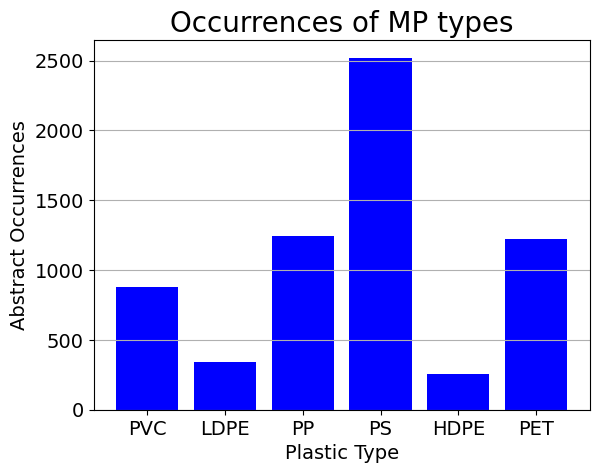

In [7]:
fig, ax = plt.subplots(1,1)
ax.bar(total_plastic_counts.keys(), total_plastic_counts.values(), color = 'blue')
ax.set_xlabel('Plastic Type', fontsize = 14)
ax.set_ylabel('Abstract Occurrences', fontsize = 14)
ax.set_title('Occurrences of MP types', fontsize = 20)
ax.set_xticklabels(total_plastic_counts.keys(),fontsize = 14)
ax.grid('- -', axis = 'y')
plt.yticks(fontsize=14) 
plt.savefig('results/types.png', dpi = 200)

In [8]:
def store_plastic_years(abstract, year):
    plastic_years = {plastic: [] for plastic in plastics}
    for plastic in plastics:
        pattern = rf'\b{plastic}\b'
        matches = re.finditer(pattern, abstract, flags=re.IGNORECASE)
        for match in matches:
            plastic_years[plastic].append(year)
    return plastic_years


plastic_years_list = []
for idx, row in dados_total.iterrows():
    abstract = row['Abstract']
    year = row['Publication Year']
    plastic_years_list.append(store_plastic_years(abstract, year))

# Summing up occurrences of each plastic type across all years
total_plastic_years = {plastic: sum((plastic_years[plastic] for plastic_years in plastic_years_list), []) for plastic in plastics}

plastic_timeline = {}

for plastic in total_plastic_years.keys():
    plastic_timeline[plastic] = [[], []]
    for year in list(range(2015, 2024)):
        plastic_timeline[plastic][0].append(year)
        plastic_timeline[plastic][1].append(total_plastic_years[plastic].count(year))

In [9]:
plastic_timeline

{'PVC': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [3, 8, 1, 12, 44, 150, 85, 220, 250]],
 'LDPE': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [0, 6, 3, 4, 30, 16, 47, 83, 113]],
 'PP': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [2, 8, 18, 31, 52, 119, 222, 288, 365]],
 'PS': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [6, 10, 55, 27, 144, 262, 392, 563, 770]],
 'HDPE': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [0, 2, 3, 2, 17, 15, 44, 94, 53]],
 'PET': [[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
  [1, 2, 13, 35, 56, 105, 234, 306, 339]]}

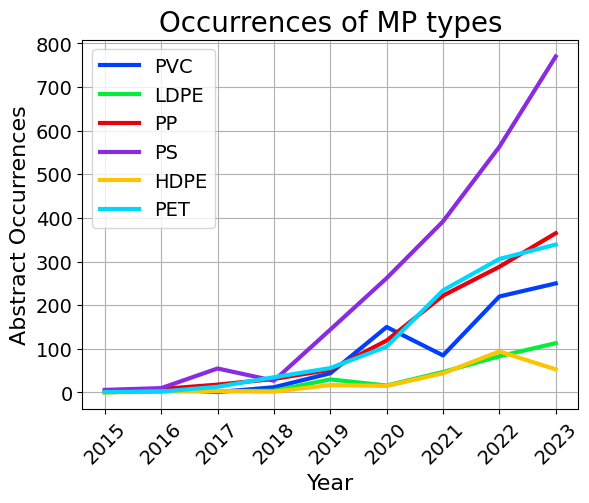

In [10]:
fig, ax = plt.subplots(1,1)
for plastic in plastics:
    ax.plot(plastic_timeline[plastic][0],plastic_timeline[plastic][1], label = plastic, linewidth = 3)

ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Abstract Occurrences', fontsize = 16)
ax.set_title('Occurrences of MP types', fontsize = 20)
ax.set_xticks(list(range(2015, 2024)))
ax.legend(fontsize = 14)

ax.set_xticklabels(list(range(2015, 2024)),fontsize = 14,rotation=45)
plt.yticks(fontsize=14) 
ax.grid('- -')
plt.savefig('results/types_timeline.png', dpi = 200)